## Observations and Insights 

In [10]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Import data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read data files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check number of mice
mice = mouse_study["Mouse ID"]
unique_mice = set(mice)
total_unique_mice = len(unique_mice)

total_unique_mice

249

In [3]:
# Get duplicate mice by ID number for Mouse ID and Timepoint
duplicate_mice = mouse_study[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"])]

duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
cleaned_df = mouse_study.drop(mouse_study[mouse_study["Mouse ID"] == "g989"].index)

In [5]:
# Check the number of mice in the clean DataFrame
cleaned_mice = cleaned_df["Mouse ID"]
unique_cleaned_mice = set(cleaned_mice)
total_cleaned_mice = len(unique_cleaned_mice)

total_cleaned_mice

248

## Summary Statistics

In [6]:
## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Group by regimen
regimen_group = cleaned_df.groupby("Drug Regimen")

# Calculate mean
regimen_tumor_mean = regimen_group["Tumor Volume (mm3)"].mean()

# Calculate median
regimen_tumor_median = regimen_group["Tumor Volume (mm3)"].median()

# # Calculate variance
regimen_tumor_var = regimen_group["Tumor Volume (mm3)"].var()

# # Calculate std dev
regimen_tumor_stddev = regimen_group["Tumor Volume (mm3)"].std()

# # Calculate SEM
regimen_tumor_sem = regimen_group["Tumor Volume (mm3)"].sem()

# Create dataframe
regimen_group_df = pd.DataFrame({"Tumor Vol Mean":regimen_tumor_mean, "Tumor Vol Median":regimen_tumor_median,
                                 "Tumor Vol Variance":regimen_tumor_var, "Tumor Vol Std Deviation":regimen_tumor_stddev,
                                 "Tumor Vol SEM":regimen_tumor_sem})

# Display
regimen_group_df

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol Std Deviation,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
## Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

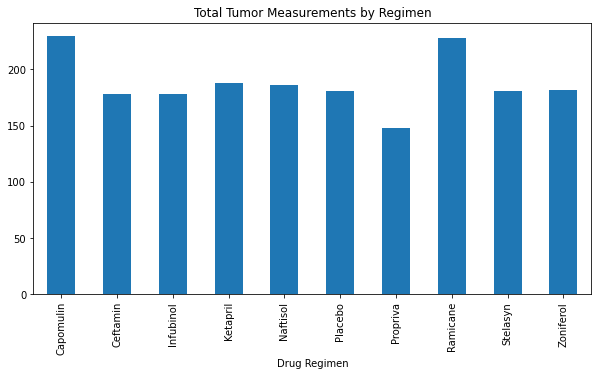

In [7]:
## Generate a bar plot showing the total number of measurements taken on each drug regimen using ***pandas***
total_measurements = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()

total_measurements.plot(kind="bar", figsize=(10,5), title="Total Tumor Measurements by Regimen")

plt.show()

In [16]:
## Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot
# Set x axis and tick locations
#total_measurements_x_axis = 
# total_measurements_tick_locs = [value for value in total_measurements]

# # Create bar chart and set formatting/parameters
# plt.figure(figsize=(10,5))
# plt.bar(total_measurements, cleaned_df(["Tumor Volume (mm3)"].count()), color="blue", align="center")
# plt.xticks(total_measurements_tick_locs, cleaned_df["Drug Regimen"], rotation="vertical")

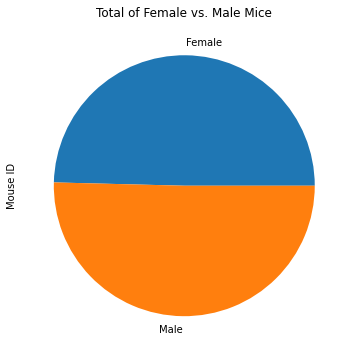

In [36]:
## Generate a pie plot showing the distribution of female versus male mice using ***pandas***

gender_dist = cleaned_df.groupby("Sex")
gender_dist_df = gender_dist["Mouse ID"].nunique()

gender_dist_df.plot(kind="pie", figsize=(6,6), title="Total of Female vs. Male Mice")

([<matplotlib.patches.Wedge at 0x1d3d1e89630>,
 [Text(-0.7679021568231756, 0.7876079465992678, 'Female'),
  Text(0.7679021568231755, -0.7876079465992679, 'Male')],
 [Text(-0.4188557219035503, 0.42960433450869145, '49.6%'),
  Text(0.41885572190355025, -0.42960433450869157, '50.4%')])

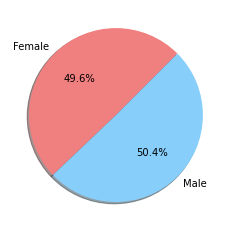

In [48]:
## Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = gender_dist_df
colors = ["lightcoral", "lightskyblue"]

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=45)

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# # Create a graph based upon the list and array we have created
# plt.plot(x_axis, e_x)
# # Show the graph that we have created
# plt.show()
# plt.xlabel("Time With MatPlotLib")
# plt.ylabel("How Cool MatPlotLib Seems")

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
#             s=x_axis, alpha=0.75)

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
